This notebook is going to try to explain a simple trading strategy usually called Mean Reversion.
The idea behind this algorithm is that we looking a long price mean for a stock you see a trend and you can compare that trend with a short mean (usually 10 days) to find patterns in which the short mean falls back to the long mean in the long term.

In [9]:
%matplotlib inline

import quandl
import pandas as pd
import matplotlib.pyplot as plt

Get key

In [2]:
api_key = open('quandlapikey.txt', 'r').read()

In [3]:
query = 'EOD/AAPL'
df = quandl.get(query, authtoken=api_key)
print df.head()

             Open   High    Low  Close     Volume  Dividend  Split  Adj_Open  \
Date                                                                           
1980-12-12  28.75  28.87  28.75  28.75  2093900.0       0.0    1.0  0.424421   
1980-12-15  27.38  27.38  27.25  27.25   785200.0       0.0    1.0  0.404196   
1980-12-16  25.37  25.37  25.25  25.25   472000.0       0.0    1.0  0.374524   
1980-12-17  25.87  26.00  25.87  25.87   385900.0       0.0    1.0  0.381905   
1980-12-18  26.63  26.75  26.63  26.63   327900.0       0.0    1.0  0.393125   

            Adj_High   Adj_Low  Adj_Close   Adj_Volume  
Date                                                    
1980-12-12  0.426193  0.424421   0.424421  117258400.0  
1980-12-15  0.404196  0.402277   0.402277   43971200.0  
1980-12-16  0.374524  0.372752   0.372752   26432000.0  
1980-12-17  0.383824  0.381905   0.381905   21610400.0  
1980-12-18  0.394896  0.393125   0.393125   18362400.0  


Calculate means

In [23]:
x = df['Adj_Close']
mavg_30 = pd.rolling_mean(x, window=30)
mavg_10 = pd.rolling_mean(x, window=10)

print mavg_10[-10:]
print mavg_30[-30:]

Date
2017-05-24    153.820
2017-05-25    153.812
2017-05-26    153.563
2017-05-30    153.360
2017-05-31    153.089
2017-06-01    153.382
2017-06-02    153.673
2017-06-05    153.760
2017-06-06    153.806
2017-06-07    153.963
Name: Adj_Close, dtype: float64
Date
2017-04-26    141.727351
2017-04-27    141.837899
2017-04-28    141.936163
2017-05-01    142.154935
2017-05-02    142.355780
2017-05-03    142.595465
2017-05-04    142.765105
2017-05-05    143.032012
2017-05-08    143.442665
2017-05-09    143.877884
2017-05-10    144.191932
2017-05-11    144.539178
2017-05-12    144.964398
2017-05-15    145.385248
2017-05-16    145.797103
2017-05-17    145.999437
2017-05-18    146.303002
2017-05-19    146.635852
2017-05-22    147.010325
2017-05-23    147.384108
2017-05-24    147.793682
2017-05-25    148.215280
2017-05-26    148.653108
2017-05-30    149.067043
2017-05-31    149.471558
2017-06-01    149.907337
2017-06-02    150.360354
2017-06-05    150.768348
2017-06-06    151.148196
2017-06-07   

C:\Python27\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()
  
C:\Python27\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


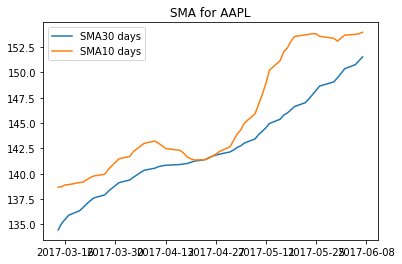

In [28]:
mavg30plt = plt.plot(mavg_30[-60:].index, mavg_30[-60:])
mavg10plt = plt.plot(mavg_10[-60:].index, mavg_10[-60:])
plt.title('SMA for AAPL')
plt.legend(['SMA30 days', 'SMA10 days'])
plt.show()